# Sesión 5 A

## El error (ε) en regresión lineal: de la geometría a la estadística

> **Objetivos de la clase:**
> - Recordar el ajuste de curvas polinomiales.
> - Entender el fenómeno de overfitting en casos prácticos.
> - Explicar los mínimos cuadrados ordinaros mediante el principio de máxima verosimilitud.

## 1. Introducción

Supongamos que tenemos un conjunto de entrenamiento con $N$ observaciones de $x$, 

$$[x_1, \dots, x_N],$$

en conjunto con las observaciones correspondientes de la variable objetivo $y$, 

$$[y_1, \dots, y_N].$$

En la siguiente gráfica mostramos datos de entrenamiento, con $N=20$. Estos datos se generaron eligiendo $x$ uniformemente espaciados en el intervalo $[0, 1]$, y la variable objetivo $y$ como el resultado de la función $\sin (2 \pi x)$ más un pequeño ruido distribuido normal:

```{thebe-button}
```

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Siembra una semilla
np.random.seed(0)

In [3]:
# Genera los datos (ficticios) del problema anterior
N = 21

x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, N)

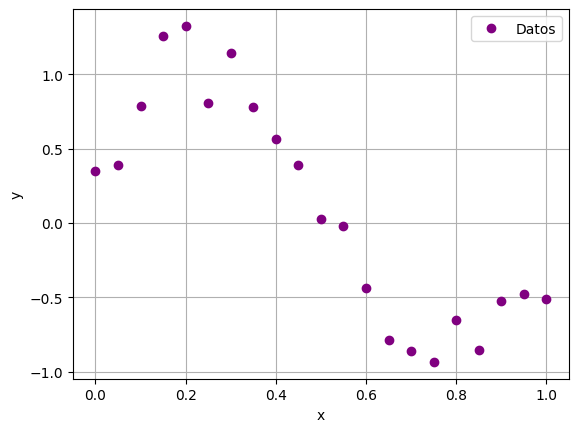

In [4]:
# Gráfica de los datos
plt.plot(x, y, 'o', label='Datos', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*Objetivo:* 

Explotar estos datos de entrenamiento para hacer predicciones $\hat{y}$ de la variable objetivo para algún nuevo valor de la variable de entrada.

*Matemáticamente:*

Antes de **formular el problema de forma probabilística**, procedamos de forma más intuitiva. Lo que queremos hacer es ajustar a los datos una función polinomial de la forma:

$$
f(x, w) = w_0 + w_1 x + w_2 x^{2} + \dots + w_M x^{M} = \sum_{j=0}^{M} w_j x^j.
$$

Notemos que aunque $f$ es una función no lineal de $x$, es una función **lineal respecto a los coeficientes $w$**.

```{admonition} Linealidad del modelo (respecto a los parámetros)
:class: tip

**¿Qué significa que una función sea lineal respecto a sus parámetros?**

Una función es *lineal en los parámetros* cuando los coeficientes aparecen *sin ser multiplicados entre sí, elevados a potencias ni dentro de funciones no lineales*.  

En otras palabras, la expresión puede escribirse como:

$$
f(x; \beta) = \beta_0 g_0(x) + \beta_1 g_1(x) + \dots + \beta_k g_k(x),
$$

donde $g_i(x)$ son funciones conocidas de las variables $x$.  

- Ejemplo lineal en los parámetros:

$$
f(x; \beta) = \beta_0 + \beta_1 x + \beta_2 x^2,
$$

(lineal en $\beta_0, \beta_1, \beta_2$, aunque no en $x$).  

- Ejemplo **no** lineal en los parámetros:

$$
f(x; \beta) = \beta_0 + e^{\beta_1 x},
$$

porque $\beta_1$ aparece dentro de una función exponencial.  

Esta distinción es crucial: si un modelo es lineal en los parámetros, se pueden usar métodos como *(OLS)* para estimarlos de forma directa.
```

Los valores de los *coeficientes (parámetros, pesos)* serán determinados *ajustando el polinomio a los datos de entrenamiento*. Esto se puede lograr minimizando una **función de error** (de costo o de pérdida) que mide la falta de ajuste entre la función $f(x, w)$ y los datos de entrenamiento.

Una elección comúnmente usada para esta función de error está dada por la suma de cuadrados de los errores entre las predicciones sobre los datos de entrenamiento $f(x_n,w)$ y los valores correspondientes del objetivo $y_n$, de forma que minimizaremos:

$$
E(w) = \frac{1}{2}\sum_{n=1}^{N}\left(f(x_n, w) - y_n\right)^2.
$$

De forma que podemos resolver el problema de ajuste de curvas mediante la elección de $w$ para la cual $E(w)$ sea lo más pequeña posible.

**Nota.** Dado que $E(w)$ es una función cuadrática de los coeficientes $w$, sus derivadas respecto a los coeficientes serán lineales respecto a $w$, y el problema de minimización tendrá solución única.

### Expresión matricial de la función objetivo

Antes de continuar, conviene obtener una representación más compacta del problema anterior. Comencemos por trabajar con el polinomio, dándonos cuenta de que este es un producto punto entre los coeficientes $w$ y las potencias de $x$:


$$
f(x, w) = w_0 + w_1 x + w_2 x^{2} + \dots + w_M x^{M}
$$

donde:

* $x$ es la variable explicativa (escalar),
* $w_0, w_1, \dots, w_M$ son los parámetros que queremos estimar.

I. Vector de parámetros

$$
\textcolor{#164ec6}{\mathbf{w}} = \underbrace{\left[\begin{array}{c} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_M\end{array}\right]}_{w}
$$

II. Vector de características (o variables independientes)

$$
\textcolor{#00b050}{\phi(x)^\top} = 
\underbrace{[1 \quad x \quad x^2 \quad \dots \quad x^M]}_{\phi(x)^\top}
$$

III. Producto escalar o producto punto

$$
f(x; w) \;=\; \textcolor{#00b050}{\phi(x)^\top} \textcolor{#164ec6}{\mathbf{w}}
$$

$$
\color{purple}{\Phi} =
\begin{bmatrix}
\textcolor{#00b050}{\phi(x_1)^\top} \\
\textcolor{#00b050}{\phi(x_2)^\top} \\
\vdots \\
\textcolor{#00b050}{\phi(x_N)^\top}
\end{bmatrix}
$$

IV. Matriz de diseño

$$
\textcolor{#800080}{\Phi}\,\textcolor{#164ec6}{\mathbf{w}} \;=\;
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^M \\
1 & x_2 & x_2^2 & \dots & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^M
\end{bmatrix}
\left[\begin{array}{c} 
w_0 \\ 
w_1 \\ 
w_2 \\ 
\vdots \\ 
w_M
\end{array}\right]
$$

V. Predicciones para todos los datos

$$
\hat{\mathbf{y}} \;=\; \Phi \, \mathbf{w}
$$

y, luego, ¿qué necesitamos hacer a continuación?

#### Norma euclidiana

##### 1. La norma euclidiana: la idea general 

Primero recordemos la definición de la norma euclidiana, que simplemente mide la *"longitud"* de un vector en el espacio.

Si tenemos un vector:

$$
v = \left[\begin{array}{c} v_1 \\ v_2 \\ \vdots \\ v_s\end{array}\right]
$$

la norma euclidiana de $v$ es:

$$
||v|| = \sqrt{v_1^2 + v_2^2 + \dots + v_s^2},
$$

o equivalentemente $||v||^2 = v_1^2 + v_2^2 + \dots + v_s^2 = \sum_{i=1}^{s} v_i^2$.

Con lo anterior, notemos que la función de error la podemos reescribir en términos de la norma de un vector:

$$
E(w) = \frac{1}{2}\sum_{n=1}^{N}\left(f(x_n, w) - y_n\right)^2 = \frac{1}{2}\sum_{n=1}^{N}\left(\phi(x_n)^T w - y_n\right)^2 = \frac{1}{2}||Z||^2,
$$

donde el vector $Z$ es:

$$
\begin{align}\nonumber
Z & = & \left[\begin{array}{c} \phi(x_1)^T w - y_1 \\ \phi(x_2)^T w - y_2 \\ \vdots \\ \phi(x_N)^T w - y_N\end{array}\right] \\ \nonumber
       & = & \underbrace{\left[\begin{array}{ccc} - & \phi(x_1)^T & - \\ - & \phi(x_2)^T & - \\ & \vdots & \\ - & \phi(x_N)^T & -\end{array}\right]}_{\Phi} w - \underbrace{\left[\begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N\end{array}\right]}_{y} \\ \nonumber
       & = & \Phi w - y
\end{align}
$$

De este modo, queremos encontrar

$$
\hat{w} = \arg \min_{w} \frac{1}{2} ||\Phi w - y||^2.
$$

### Ejercicio numérico

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
# PolinomialFeatures y Phi (matriz de diseño)
Phi = PolynomialFeatures(degree=2).fit_transform(x[:, None])
Phi

array([[1.    , 0.    , 0.    ],
       [1.    , 0.05  , 0.0025],
       [1.    , 0.1   , 0.01  ],
       [1.    , 0.15  , 0.0225],
       [1.    , 0.2   , 0.04  ],
       [1.    , 0.25  , 0.0625],
       [1.    , 0.3   , 0.09  ],
       [1.    , 0.35  , 0.1225],
       [1.    , 0.4   , 0.16  ],
       [1.    , 0.45  , 0.2025],
       [1.    , 0.5   , 0.25  ],
       [1.    , 0.55  , 0.3025],
       [1.    , 0.6   , 0.36  ],
       [1.    , 0.65  , 0.4225],
       [1.    , 0.7   , 0.49  ],
       [1.    , 0.75  , 0.5625],
       [1.    , 0.8   , 0.64  ],
       [1.    , 0.85  , 0.7225],
       [1.    , 0.9   , 0.81  ],
       [1.    , 0.95  , 0.9025],
       [1.    , 1.    , 1.    ]])

In [7]:
# Define un modelo usando Pipeline
model_3 = Pipeline([
    ("features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [8]:
# Modelo
model_3

Pipeline(steps=[('features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [9]:
# qué contiene x
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [10]:
# Genera una partición entre train/test
x_train, x_test, y_train, y_test = train_test_split(x[:, None], y, test_size=0.2, random_state=0)

In [11]:
# Ajusta el modelo
model_3.fit(x_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [12]:
# Genera los coeficientes de la regresión lineal
model_3.named_steps['model'].coef_

array([ 0.        ,  2.68944506, -8.69362895,  5.46899018])

In [13]:
# ¿cuál es el score sobre los datos de entrenamiento?
model_3.score(x_train, y_train)

0.9689517224841413

In [14]:
# ¿cuál es el score sobre los datos de test?
model_3.score(x_test, y_test)

0.6249383688421739

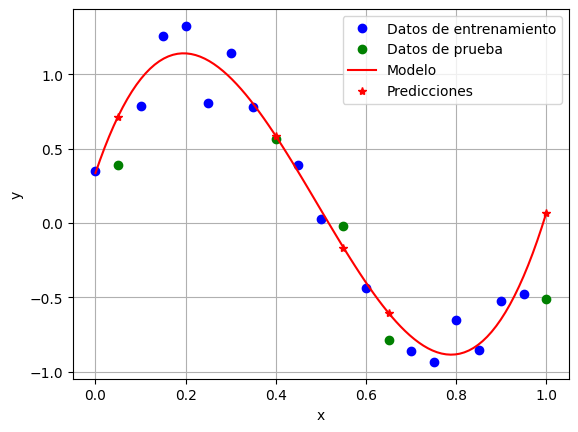

In [15]:
# Grafica los resultados de train y test, así como el polinomio
plt.plot(x_train[:, 0], y_train, 'ob', label='Datos de entrenamiento')
plt.plot(x_test[:, 0], y_test, 'og', label='Datos de prueba')
x_model = np.linspace(0, 1, 100)
y_model = model_3.predict(x_model[:, None])
plt.plot(x_model, y_model, '-r', label='Modelo')
plt.plot(x_test[:, 0], model_3.predict(x_test), '*r', label='Predicciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Define un nuevo modelo con grado 10
model_10 = Pipeline([
    ("features", PolynomialFeatures(degree=10)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [17]:
# Ajusta el modelo anterior
model_10.fit(x_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [18]:
# ¿cuál es el score sobre los datos de entrenamiento?
model_10.score(x_train, y_train)

0.9813649100890841

In [19]:
# ¿cuál es el score sobre los datos de test?
model_10.score(x_test, y_test)

-0.7390395810744586

In [28]:
model_10.named_steps['model'].coef_

array([ 0.00000000e+00, -2.40211807e+01,  6.53450759e+02, -6.06570585e+03,
        2.95505205e+04, -8.65461440e+04,  1.60397198e+05, -1.89815379e+05,
        1.39212212e+05, -5.76984818e+04,  1.03357435e+04])

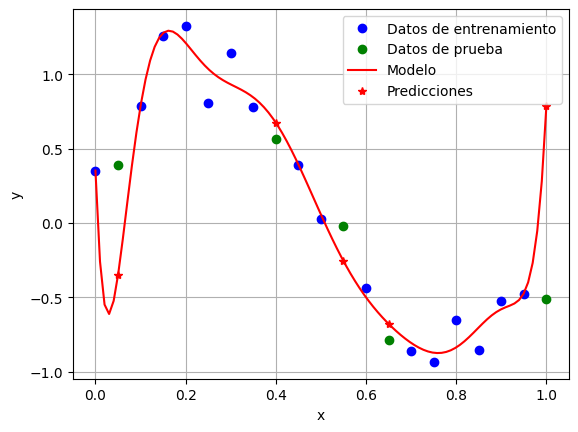

In [20]:
# Grafica los resultados de train y test, así como el polinomio
plt.plot(x_train[:, 0], y_train, 'ob', label='Datos de entrenamiento')
plt.plot(x_test[:, 0], y_test, 'og', label='Datos de prueba')
x_model = np.linspace(0, 1, 100)
y_model = model_10.predict(x_model[:, None])
plt.plot(x_model, y_model, '-r', label='Modelo')
plt.plot(x_test[:, 0], model_10.predict(x_test), '*r', label='Predicciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Overfitting

Hasta ahora, hemos definido la función de error como

$$
\textcolor{#960096}{E(\mathbf{w}) \;=\; \tfrac{1}{2}\|\Phi \mathbf{w} - \mathbf{y}\|^2},
$$

donde la norma euclidiana mide el tamaño del vector de errores 
$\mathbf{e} = \Phi \mathbf{w} - \mathbf{y}$.

👉 Sin embargo, **aún no hemos puesto ninguna restricción sobre los parámetros** 
$\mathbf{w}$.  
Si los pesos crecen demasiado (por ejemplo, al intentar ajustar exactamente todos los puntos de entrenamiento), podemos caer en **overfitting**: el modelo memoriza el ruido en lugar de generalizar.

Para evitarlo, añadimos un nuevo término a la función objetivo que ahora también 
mida la magnitud de los parámetros. Así obtenemos la **regresión Ridge**:

$$
E_{\text{ridge}}(\mathbf{w}) 
= \textcolor{#960096}{\tfrac{1}{2}\|\Phi \mathbf{w} - \mathbf{y}\|^2}
+ \textcolor{#164ec6}{\tfrac{\lambda}{2}\|\mathbf{w}\|^2},
$$

donde el hiperparámetro $\lambda \geq 0$ controla el equilibrio entre:

- **Buen ajuste a los datos** (primer término).  
- **Mantener los parámetros pequeños** (segundo término).  

- Si $\lambda = 0$, recuperamos la regresión normal.  
- Si $\lambda$ es grande, los pesos se reducen mucho y el modelo se vuelve más simple.

¿qué solución óptima nos ofrece la regresión Ridge?



In [30]:
from sklearn.linear_model import Ridge, Lasso

In [31]:
Lasso?

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    squares, solved by the :class:`LinearRegression` object. For numerical
    reasons, using `alpha = 0` with the `Lasso` object is not advised.

In [22]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    s

In [23]:
# Define un pipeline, incluyendo ahora Ridge
model_10_ridge = Pipeline([
    ("features", PolynomialFeatures(degree=10)),
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1e-3))
])

In [24]:
# Ajusta el modelo
model_10_ridge.fit(x_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=0.001))])

In [25]:
# ¿cuál es el score sobre los datos de entrenamiento?
model_10_ridge.score(x_train, y_train)

0.972800357412489

In [26]:
# ¿cuál es el score sobre los datos de test?
model_10_ridge.score(x_test, y_test)

0.8762430489487567

In [27]:
# Observa los coeficientes
model_10_ridge.named_steps['model'].coef_

array([ 0.        ,  2.12074277, -5.03426724, -0.72828463,  1.42179304,
        1.60445406,  1.00996397,  0.30152153, -0.23913149, -0.51434418,
       -0.50884092])

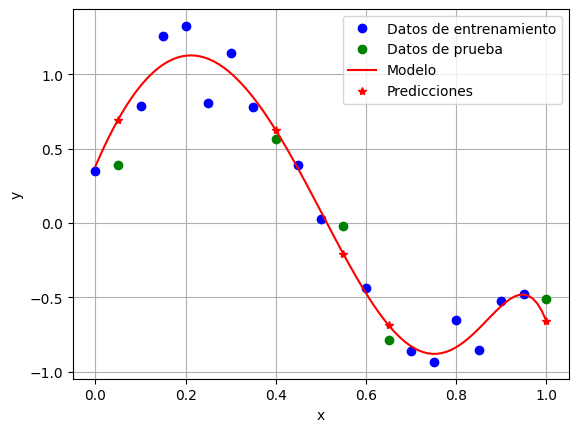

In [29]:
# Grafica los resultados de train y test, así como el polinomio
plt.plot(x_train[:, 0], y_train, 'ob', label='Datos de entrenamiento')
plt.plot(x_test[:, 0], y_test, 'og', label='Datos de prueba')
x_model = np.linspace(0, 1, 100)
y_model = model_10_ridge.predict(x_model[:, None])
plt.plot(x_model, y_model, '-r', label='Modelo')
plt.plot(x_test[:, 0], model_10_ridge.predict(x_test), '*r', label='Predicciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

*¿qué pasa si incrementamos la cantidad de datos de entrenamiento?*

In [32]:
# Genera N=201

N = 201
x = np.linspace(0, 1, N)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, N)

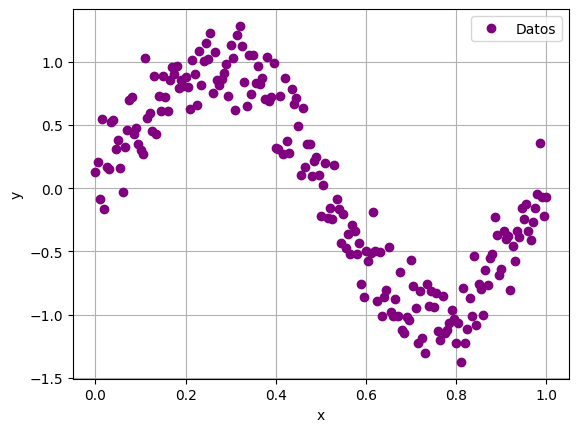

In [33]:
# Grafica la nube de puntos
plt.plot(x, y, 'o', label='Datos', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Separa en train/test
x_train, x_test, y_train, y_test = train_test_split(x[:, None], y, test_size=0.2, random_state=0)

In [35]:
# 
model_10_ridge.fit(x_train, y_train)

Pipeline(steps=[('features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=0.001))])

In [36]:
# Compara los scores de train y test
train_score = model_10_ridge.score(x_train, y_train)
test_score = model_10_ridge.score(x_test, y_test)

print(f"Train score: {train_score:.3f}, Test score: {test_score:.3f}")

Train score: 0.938, Test score: 0.909


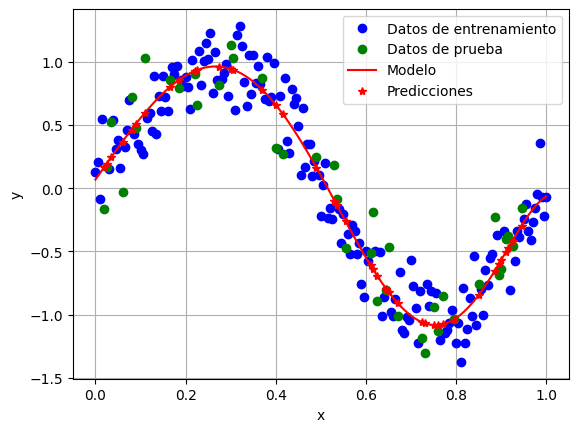

In [37]:
# Grafica los resultados de train y test, así como el polinomio
plt.plot(x_train[:, 0], y_train, 'ob', label='Datos de entrenamiento')
plt.plot(x_test[:, 0], y_test, 'og', label='Datos de prueba')
x_model = np.linspace(0, 1, 100)
y_model = model_10_ridge.predict(x_model[:, None])
plt.plot(x_model, y_model, '-r', label='Modelo')
plt.plot(x_test[:, 0], model_10_ridge.predict(x_test), '*r', label='Predicciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

```{admonition} Sobre overfitting
:class: tip

![](../images/sesion5_regularizacion1.png)

**Figura 1**: Lo que muestra es cómo se ven las “bolas de restricción” (constraint balls) en 3D para distintos tipos de regularización: Ridge “encoge” los coeficientes pero difícilmente los lleva exactamente a cero; En Lasso, algunos coeficientes se vuelven exactamente cero; Elastic Net combina ambas propiedades. Hastie, *et al.*, 2020; Disponible en: https://arxiv.org/html/2006.00371v2. 

![](../images/sesion5_overfitting1.png)

- **Punto rojo (OLS)**: mínimo sin regularización (en el centro de los contornos).  

- **Punto verde (óptimo)**: solución con regularización:  

  - **Ridge (L2)**:  
    $w^* \;=\; \frac{\mu}{1 + \lambda_2}$ → los coeficientes se *encogen* hacia el origen (**shrinkage**).  

  - **Lasso (L1)**:  
    $w^* \;=\; \text{soft}(\mu, \tfrac{\lambda_1}{2})$ → algunos coeficientes se reducen a 0 (*sparsity*).  

  - **Elastic Net (L1+L2)**:  
    $w^* \;=\; \frac{1}{1 + \lambda_2}\,\text{soft}(\mu, \tfrac{\lambda_1}{2})$ → combinación: *shrinkage* (L2) + *sparsity* (L1).  

Para más información acerca de regularización y overfitting:

Hastie, T. (2020). *Ridge Regularization: an Essential Concept in Data Science.* Stanford University. [arXiv](https://arxiv.org/html/2006.00371v2).

## Perspectiva probabilística

En OLS definimos el error de ajuste de manera puramente geométrica, como la suma de cuadrados de los residuos.  

En cambio, en el enfoque probabilístico de **Máxima Verosimilitud (MLE)**, partimos de un modelo:

$$
y = \phi(x)^{\top} w + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \beta^{-1})
$$

Esto implica que, dado $x$, la variable de salida $y$ sigue una distribución normal:

$$
p(y \mid x, w) = \mathcal{N}\big(y \mid \phi(x)^{\top} w, \, \beta^{-1}\big)
$$


![](../images/sesion5-modeldistr.png)

> **Figura 1:** Los puntos negros representan las observaciones $(x_i, y_i)$.  
> La línea azul es el valor esperado del modelo $\phi(x)^\top w$.  
> Las curvas rojas muestran la distribución empírica de los residuos, mientras que las curvas turquesa representan la distribución normal teórica asumida $\mathcal{N}(0, \beta^{-1})$.  
> La figura ilustra que $p(y \mid x,w) \sim \mathcal{N}(\phi(x)^\top w, \beta^{-1})$, es decir, los datos se distribuyen alrededor de la recta con ruido gaussiano.

Asumiendo independencia entre las observaciones, la **función de verosimilitud** es:

$$
\mathcal{L}(w) = \prod_{i=1}^N \mathcal{N}(y_i \mid \phi(x_i)^{\top} w, \beta^{-1})
$$

y su logaritmo:

\begin{align}
     & = \sum_{i=1}^{N} \log\mathcal{N}(y_i | \phi(x_i)^T w, \beta^{-1}) \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \sum_{i=1}^{N} (y_i - \phi(x_i)^T w)^2 \\
     & = \frac{N}{2}\log\beta - \frac{N}{2}\log(2 \pi) - \frac{\beta}{2} \left|\left|y - \Phi w\right|\right|^2
\end{align}

Finalmente, maximizar $\ell(w)$ respecto a $w$ es equivalente a minimizar:

$$
\hat{w}_{MLE} = \arg \max_{w} l(w) = \arg \min_{w} \left|\left|y - \Phi w\right|\right|^2
$$

que es exactamente el mismo criterio de **OLS**.  

Así, OLS surge como un **caso particular de MLE** bajo el supuesto de ruido gaussiano.

![](../images/sesion5_mle1.png)

![](../images/sesion5_mle2.png)

Observamos que la estimación de parámetros por máxima verosimilitud, explica nuestra intuición detrás de mínimos cuadrados.

Además, **una vez más concluimos que el enfoque de máxima verosimilitud nos puede traer problemas de overfitting**.